Erst werden alle dependencies geladen:

In [ ]:
from ipyfilechooser import FileChooser
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, HBox, VBox
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from df_columns import df_cols

def likelihood_filtering(df, likelihood_row_name=str, filter_val = 0.95):
        """
        DeepLabCut provides a likelihood for the prediction of 
        each bodypart in each frame to be correct. Filtering predictions
        for the likelihood, reduces false predictions in the dataset.
        """
        df_filtered = df.copy()
        df_filtered = df[df[likelihood_row_name] > filter_val]
        df_removed_rows = df[df[likelihood_row_name] < filter_val]
        #print(f"The filter removed {len(df_removed_rows)} rows of a total of {len(df)} rows.")
        return df_filtered

# user kann path eingeben
path = widgets.Text(description = 'path to datefolder', layout=widgets.Layout(width='600px'))
# globale variable, wo der path gespeichert wird
selected_path = ""


read_files = widgets.Button(description = 'read csv files')
output_path = widgets.Output()
output_read_files = widgets.Output()
select_file = widgets.Dropdown()
output_file = widgets.Output()

# Callback für Textfeld
def print_path(change):
    global selected_path  
    selected_path = change['new']
    with output_path:
        output_path.clear_output()
        print(f'Selected path: {selected_path}')

# Callback für Button
def read_csv_files(change):
    global select_file
    with output_read_files:
        output_read_files.clear_output()
        if os.path.isdir(selected_path):
            files = glob.glob(os.path.join(selected_path, '*.csv'))
            if files:
                print(f"{len(files)} CSV-Dateien gefunden:")
                print(f"This is the first file:\n{files[0]}")
                files.sort()
                select_file.options = files
            else:
                print("Keine CSV-Dateien gefunden.")
        else:
            print("Ungültiger Pfad:", selected_path)


path.observe(print_path, names='value')
read_files.on_click(read_csv_files)

display(path, output_path, read_files, output_read_files, select_file)
keypoints = widgets.Dropdown(options = ['nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'])
display(keypoints, output_file)

def plot_on_file_selection(change):

    with output_file:
        output_file.clear_output()

        df = pd.read_csv(select_file.value, names=df_cols)
        print(f'You chose {select_file.value}')
        data = df.copy()
        data = data.iloc[3:]
        data = data.astype(float)

        

        # Plotten mit Colormap

        import matplotlib.pyplot as plt
        import matplotlib.collections as mc
        import numpy as np

        # filter likelihood
        data_filtered = likelihood_filtering(df = data.copy(), likelihood_row_name=keypoints.value+'_likelihood', filter_val=0.50)

        # Beispiel: Ihre Daten (bitte x_coords und y_coords entsprechend setzen)
        x_coords = data_filtered[keypoints.value+'_x']
        y_coords = data_filtered[keypoints.value+'_y'] * -1

        # X- und Y-Koordinaten in Segmente aufteilen
        points = np.array([x_coords, y_coords]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Colormap definieren
        norm = plt.Normalize(0, len(x_coords))
        lc = mc.LineCollection(segments, cmap='viridis', norm=norm)
        lc.set_array(np.arange(len(x_coords)))
        lc.set_linewidth(2)

        # Plot erstellen
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.add_collection(lc)
        ax.set_xlim(0, 2000.0)
        ax.set_ylim(0, -1200.0)
        ax.set_title("Mouse Trajectory Plot with Colormap")
        ax.set_xlabel("X coordinate")
        ax.set_ylabel("Y coordinate")
        ax.grid(True)
        ax.set_aspect('equal')

        # Colorbar (optional)
        cbar = plt.colorbar(lc, ax=ax)
        cbar.set_label('Time (frame number)')

        plt.show()

keypoints.observe(plot_on_file_selection)
select_file.observe(plot_on_file_selection)


Text(value='', description='path to datefolder', layout=Layout(width='600px'))

Output()

Button(description='read csv files', style=ButtonStyle())

Output()

Dropdown(options=(), value=None)

Dropdown(options=('nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'), value='nose')

In [51]:
df = pd.read_csv(select_file.value, names=df_cols)
print(f'You chose {select_file.value}')
data = df.copy()
data = data.iloc[3:]
data = data.astype(float)

keypoints = widgets.Dropdown(options = ['nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'])
display(keypoints)



You chose Z:\n2023_odor_related_behavior\2023_behavior_setup_seminatural_odor_presentation\analyse\mouse_15\2025_04_23\top1\2025_04_22_12_25_06_mouse_15_habituation_top1_40439818DLC_resnet50_mice_incubationMar12shuffle1_300000.csv


Dropdown(options=('nose', 'spine1', 'spine2', 'centroid', 'spine3', 'spine4', 'tail1'), value='nose')

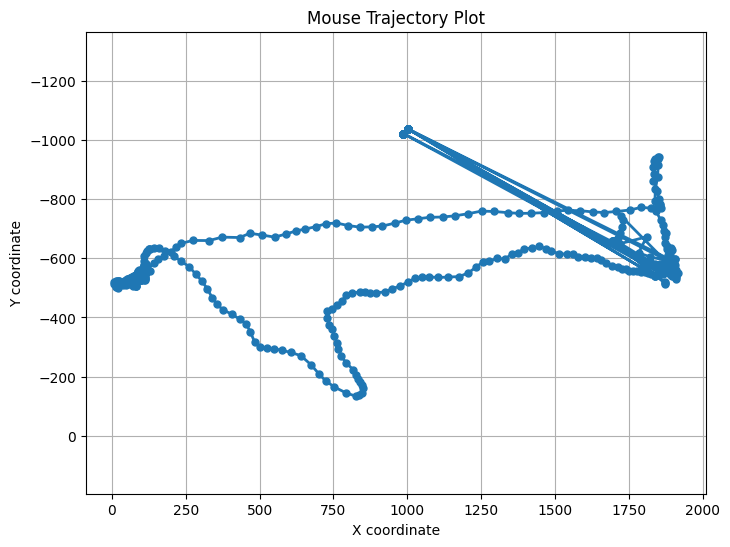

In [52]:
import matplotlib.pyplot as plt
import numpy as np


# Sample data: x and y coordinates over time
x_coords = data[keypoints.value+'_x']
y_coords = data[keypoints.value+'_y']*-1

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlim((000.0, 2000.0))
plt.ylim((-300.0, -1200.0 ))
plt.title("Mouse Trajectory Plot")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.axis('equal')  # Optional: makes the aspect ratio 1:1
plt.show()

311.0


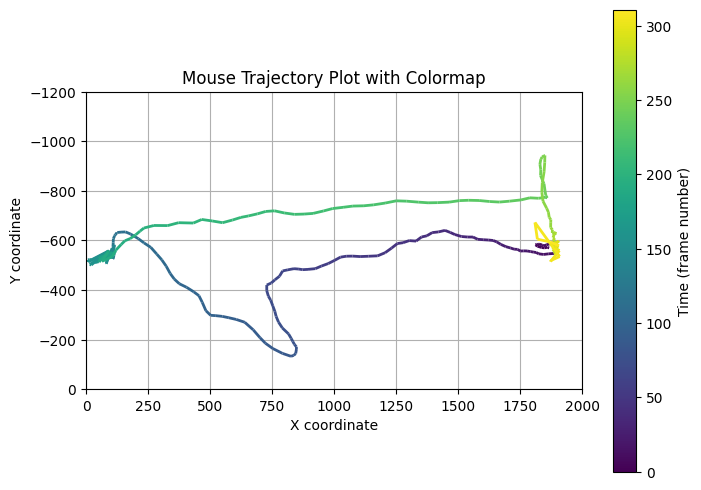

In [ ]:
# Plotten mit Colormap

import matplotlib.pyplot as plt
import matplotlib.collections as mc
import numpy as np

# filter likelihood
data_filtered = likelihood_filtering(df = data.copy(), likelihood_row_name=keypoints.value+'_likelihood', filter_val=0.50)

# Beispiel: Ihre Daten (bitte x_coords und y_coords entsprechend setzen)
x_coords = data_filtered[keypoints.value+'_x']
y_coords = data_filtered[keypoints.value+'_y'] * -1

# X- und Y-Koordinaten in Segmente aufteilen
points = np.array([x_coords, y_coords]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Colormap definieren
norm = plt.Normalize(0, len(x_coords))
lc = mc.LineCollection(segments, cmap='viridis', norm=norm)
lc.set_array(np.arange(len(x_coords)))
lc.set_linewidth(2)

# Plot erstellen
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.set_xlim(0, 2000.0)
ax.set_ylim(0, -1200.0)
ax.set_title("Mouse Trajectory Plot with Colormap")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.grid(True)
ax.set_aspect('equal')

# Colorbar (optional)
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Time (frame number)')

plt.show()

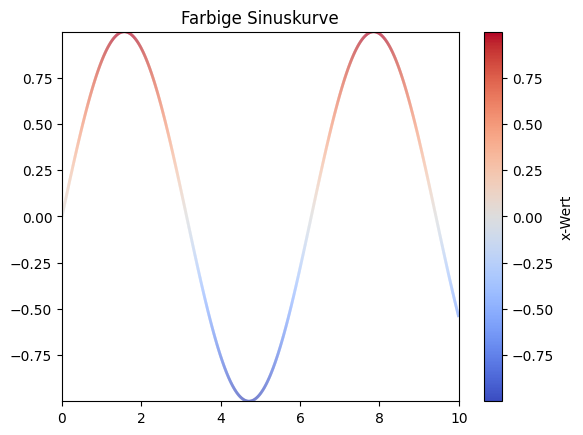

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# 1. Daten erzeugen
x = np.linspace(0, 10, 5000)
y = np.sin(x)

# 2. Segmente für die LineCollection erstellen
points = np.array([x, y]).T.reshape(-1, 1, 2)    # Punkte als 2D-Array
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Liniensegmente bilden


# 3. Eine Colormap auf die x-Werte anwenden
norm = plt.Normalize(y.min(), y.max())  # Normierung der Farben
lc = LineCollection(segments, cmap='coolwarm', norm=norm)  # 'viridis' ist eine schöne Colormap
lc.set_array(y)  # Wähle x als Farbkriterium
lc.set_linewidth(2)

# 4. Plot erstellen
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
plt.colorbar(lc, ax=ax, label='x-Wert')  # Farblegende
plt.title("Farbige Sinuskurve")
plt.show()

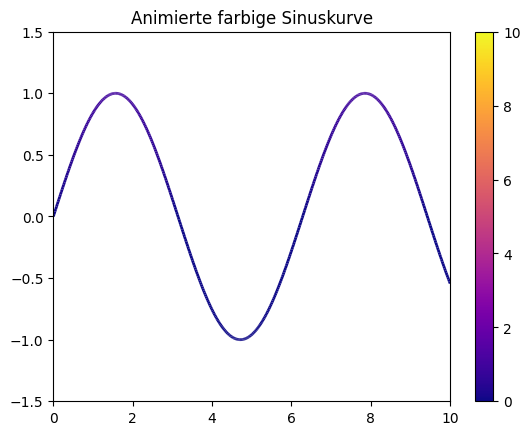

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
x = np.linspace(0, 10, 500)
line_collection = LineCollection([], cmap='plasma', norm=plt.Normalize(x.min(), x.max()))
line_collection.set_linewidth(2)
ax.add_collection(line_collection)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.5, 1.5)
cb = plt.colorbar(line_collection, ax=ax)

def update(frame):
    y = np.sin(x + frame / 10.0)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    line_collection.set_segments(segments)
    line_collection.set_array(y)  # Jetzt hängt die Farbe vom y-Wert ab
    return line_collection,

ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
plt.title("Animierte farbige Sinuskurve")
plt.show()

In [10]:
# First cell
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

C:\Users\quicken\AppData\Local\Temp\ipykernel_15412\3587855675.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point.set_data(x_coords[frame], y_coords[frame])
C:\Users\quicken\AppData\Local\Temp\ipykernel_15412\3587855675.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_coords[frame], y_coords[frame])


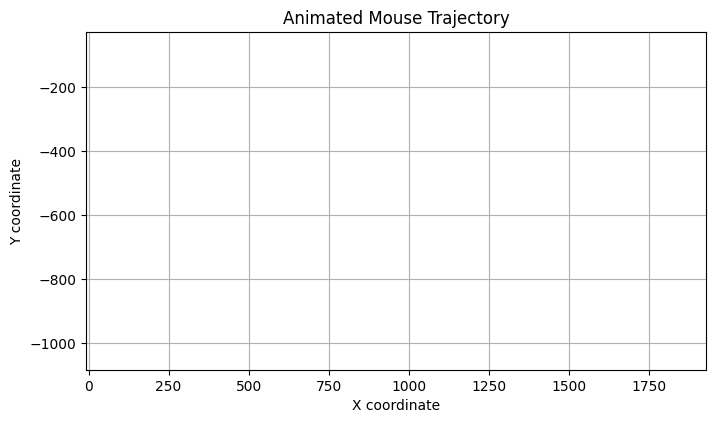

In [18]:

# Example data – replace with your real coordinates
x_coords = data[keypoints.value+'_x']
y_coords = data[keypoints.value+'_y']*-1

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], 'bo-', lw=2)
point, = ax.plot([], [], 'ro', markersize=8)

ax.set_xlim(min(x_coords) - 10, max(x_coords) + 10)
ax.set_ylim(min(y_coords) - 10, max(y_coords) + 10)
ax.set_title("Animated Mouse Trajectory")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.grid(True)
ax.set_aspect('equal')

# Initialization function
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation update function
def update(frame):
    line.set_data(x_coords[:frame+1], y_coords[:frame+1])
    point.set_data(x_coords[frame], y_coords[frame])
    return line, point

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(x_coords),
    init_func=init, interval=33, repeat=False
)
ani.save("mouse_trajectory.mp4", writer="ffmpeg", fps=30)
# Display animation inline
#HTML(ani.to_jshtml())